# Establish CAPEX estimation relationship for a pellet mill and pellet cooler

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import settings
from functions.general.utility import get_project_root
from functions.TEA import convert_currency_annual_average
from functions.TEA.scaling import CEPCI_scale
from functions.general.curve_fitting import display_curve_fits, func_straight_line, func_power_curve


In [2]:
### Load data and do some data wrangling
# General parameters
root_dir = get_project_root()
updated_currency = "GBP"
updated_CEPCI_year = 2020
plot_style = settings.plotting.digital


In [3]:
# Load and display data for the pellet mill
data_file_mill = "CAPEX_pellet_mill.csv"
data_file_path_mill = os.path.join(root_dir, "data", data_file_mill)
df_source_mill = pd.read_csv(data_file_path_mill)
df_mill = df_source_mill.copy()  # working copy of original dataframe

# Convert all values to same currency and update to most recent CEPCI value
CAPEX_currency_scaled_mill = []
CAPEX_currency_CEPCI_scaled_mill = []

for row_no in df_mill.index:
    CAPEX_currency_scaled_mill.append(
        convert_currency_annual_average(value=df_mill["CAPEX"][row_no], year=df_mill["Reference Year"][row_no],
                                        base_currency=df_mill["Currency"][row_no], converted_currency=updated_currency,
                                        approximate_rate=True))
    CAPEX_currency_CEPCI_scaled_mill.append(
        CEPCI_scale(base_year=df_mill["Reference Year"][row_no], design_year=updated_CEPCI_year,
                    value=CAPEX_currency_scaled_mill[row_no]))

# Add (i) currency and (ii) currency + CEPCI scaled values to dataframe
currency_scaled_label = "CAPEX_" + updated_currency
currency_and_CEPCI_scaled_label = "CAPEX_" + updated_currency + "_CEPCI_" + str(updated_CEPCI_year)

df_mill[currency_scaled_label] = CAPEX_currency_scaled_mill
df_mill[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled_mill

# Also add to original dataframe
df_source_mill[currency_scaled_label] = CAPEX_currency_scaled_mill
df_source_mill[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled_mill

df_mill


,Process Reference,CAPEX,Currency,Plant size [tonnes/hour],Plant size [tonnes/year],Reference Year,Country,Comments,Reference,Reference Label,doi,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Pellet mill,86066.0,USD,1.03,7394,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,46994.422180,48799.386952
1,Pellet mill,130055.0,USD,3.35,24085,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,71013.635775,73741.132039
2,Pellet mill,130055.0,USD,4.17,30000,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,71013.635775,73741.132039
3,Pellet mill,164481.0,USD,4.17,30000,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,89811.186236,93260.660021
4,Pellet mill,225683.0,USD,3.32,23873,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,123229.175061,127962.169098
5,Pellet mill,262022.0,USD,3.35,24085,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,143071.276560,148566.367300
6,Pellet mill,242896.0,USD,4.17,30000,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,132627.950292,137721.933089
7,Pellet mill,244809.0,USD,6.10,43944,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,133672.501330,138806.603310
8,Pellet mill,239071.0,USD,6.66,47958,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,130539.394243,135553.159646
9,Pellet mill,346175.0,USD,6.43,46268,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,189021.147702,196281.084032


In [4]:
# Load and display data for the pellet cooler
data_file_cooler = "CAPEX_pellet_cooler.csv"
data_file_path_cooler = os.path.join(root_dir, "data", data_file_cooler)
df_source_cooler = pd.read_csv(data_file_path_cooler)
df_cooler = df_source_cooler.copy()  # working copy of original dataframe

# Convert all values to same currency and update to most recent CEPCI value
CAPEX_currency_scaled_cooler = []
CAPEX_currency_CEPCI_scaled_cooler = []

for row_no in df_cooler.index:
    CAPEX_currency_scaled_cooler.append(
        convert_currency_annual_average(value=df_cooler["CAPEX"][row_no], year=df_cooler["Reference Year"][row_no],
                                        base_currency=df_cooler["Currency"][row_no], converted_currency=updated_currency,
                                        approximate_rate=True))
    CAPEX_currency_CEPCI_scaled_cooler.append(
        CEPCI_scale(base_year=df_cooler["Reference Year"][row_no], design_year=updated_CEPCI_year,
                    value=CAPEX_currency_scaled_cooler[row_no]))

# Add (i) currency and (ii) currency + CEPCI scaled values to dataframe
currency_scaled_label = "CAPEX_" + updated_currency
currency_and_CEPCI_scaled_label = "CAPEX_" + updated_currency + "_CEPCI_" + str(updated_CEPCI_year)

df_cooler[currency_scaled_label] = CAPEX_currency_scaled_cooler
df_cooler[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled_cooler

# Also add to original dataframe
df_source_cooler[currency_scaled_label] = CAPEX_currency_scaled_cooler
df_source_cooler[currency_and_CEPCI_scaled_label] = CAPEX_currency_CEPCI_scaled_cooler

df_cooler


,Process Reference,CAPEX,Currency,Plant size [tonnes/hour],Plant size [tonnes/year],Reference Year,Country,Comments,Reference,Reference Label,doi,CAPEX_GBP,CAPEX_GBP_CEPCI_2020
0,Pellet cooler,20891.36490,USD,1.021600,7355.516637,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,11407.264448,11845.395391
1,Pellet cooler,17270.19499,USD,3.327496,23957.968480,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,9430.005281,9792.193527
2,Pellet cooler,23676.88022,USD,4.173964,30052.539400,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,12928.233042,13424.781443
3,Pellet cooler,32311.97772,USD,3.298307,23747.810860,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,17643.235685,18320.878209
4,Pellet cooler,35097.49304,USD,4.144775,29842.381790,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,19164.204278,19900.264261
5,Pellet cooler,41782.72981,USD,3.327496,23957.968480,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,22814.528902,23690.790788
6,Pellet cooler,47910.86351,USD,4.173964,30052.539400,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,26160.659805,27165.440100
7,Pellet cooler,68802.22841,USD,6.129597,44133.099820,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,37567.924254,39010.835491
8,Pellet cooler,47075.20891,USD,8.377116,60315.236430,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,25704.369225,26691.624282
9,Pellet cooler,34818.94150,USD,6.421483,46234.676010,2008,USA,Estimated annual operating hours = 7200. Data ...,"Sultana et al., 2010, ""Development of agri-pel...",a,10.1016/j.biortech.2010.02.011,19012.107414,19742.325652


## Plot pellet mill data

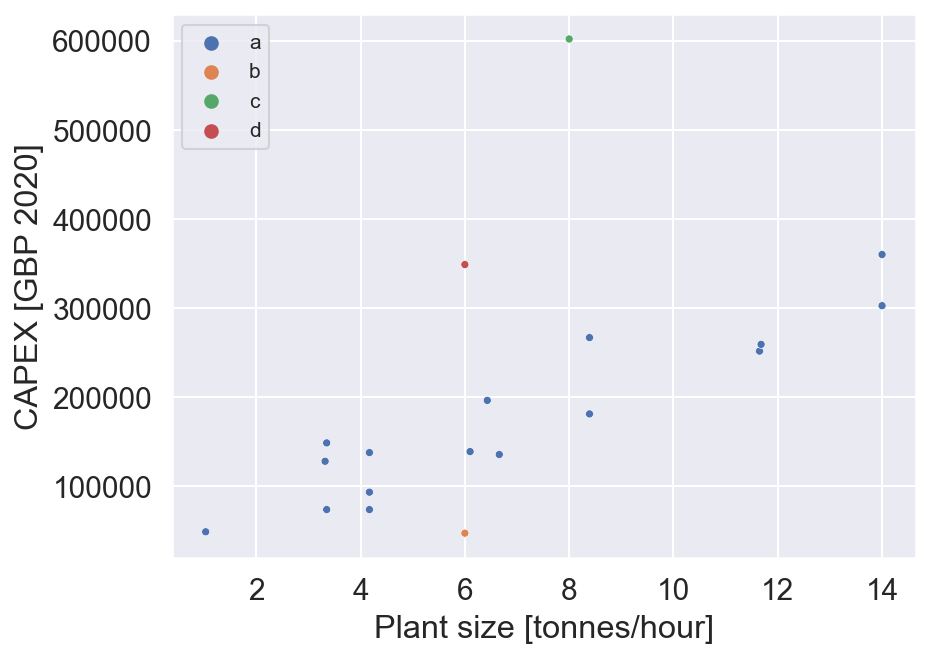

In [5]:
## Plot all data
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df_mill, x="Plant size [tonnes/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference Label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()


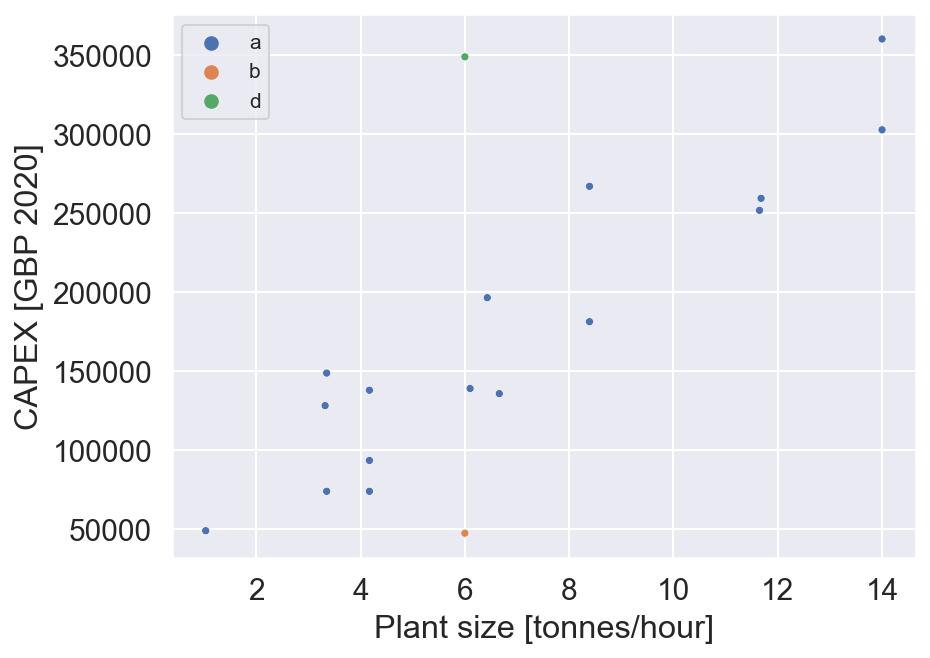

In [6]:
# Remove outliers and plot data again
df_mill = df_mill[df_mill["doi"]!= "10.2174/1876387101003010001"].copy()

## Plot all data
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df_mill, x="Plant size [tonnes/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference Label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()



## Plot curve fits to pellet mill data

Straight line fit: R2: 0.617; RMSE: 59981; MAPE: 36 %
Power curve fit: R2: 0.618; RMSE: 59921; MAPE: 35 %
2nd degree polynomial fit: R2: 0.617; RMSE: 59938; MAPE: 35 %
3rd degree polynomial: R2: 0.619; RMSE: 59822; MAPE: 36 %


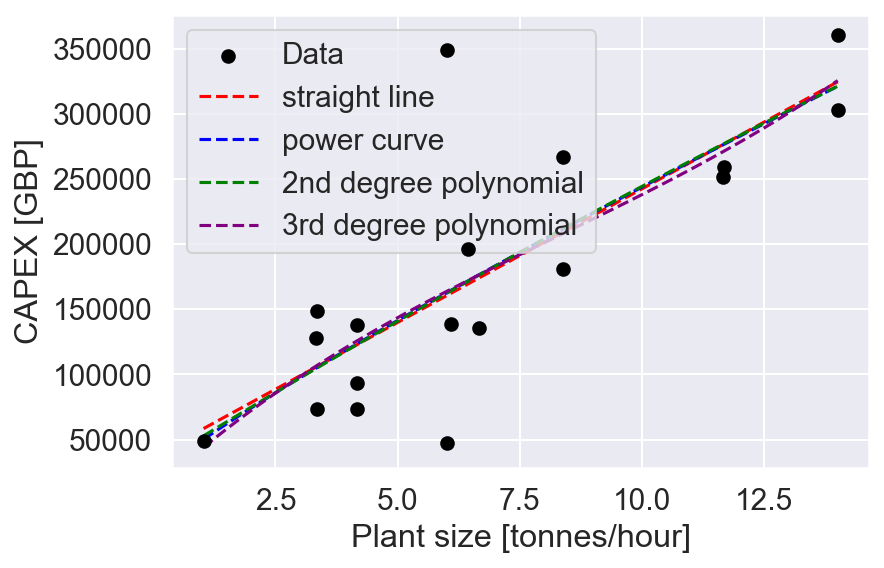

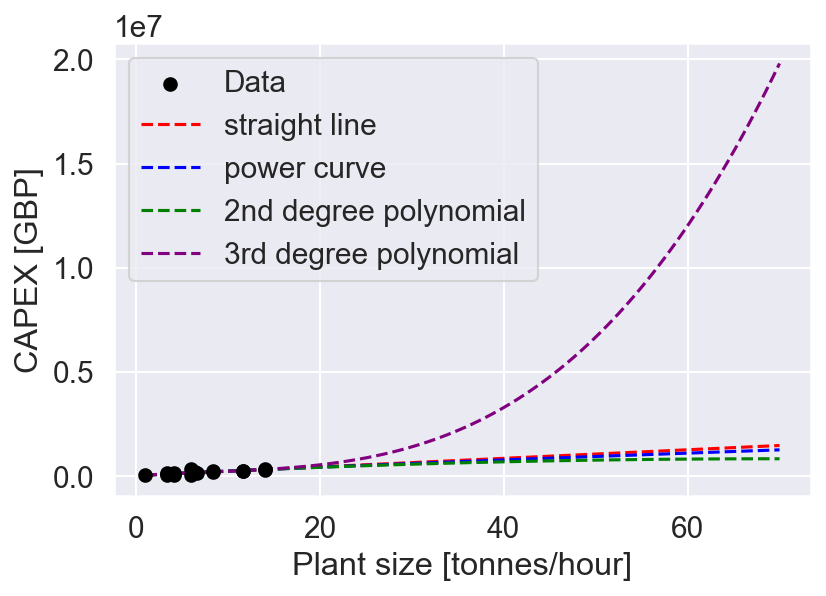

{'straight_line': {'Constants': array([20509.76068945, 37321.72296998]),
  'R2': 0.6169444277221807,
  'RMSE': 59980.695994274705},
 'power_curve': {'Constants': array([2.93460275e+04, 8.82124911e-01, 2.00465612e+04]),
  'R2': 0.6177076164986093,
  'RMSE': 59920.9143058846},
 '2nd_degree_polynomial': {'Constants': array([23178.79698092,  -166.35106641, 29145.52231105]),
  'R2': 0.6174835375437016,
  'RMSE': 59938.47292000353},
 '3rd_degree_polynomial': {'Constants': array([34340.74019795, -1945.87174147,    78.48705081, 10692.23223055]),
  'R2': 0.6189707098818633,
  'RMSE': 59821.843106061344},
 'data_range': {'min': 1.03, 'max': 14.0}}

In [7]:
display_curve_fits(dataframe=df_mill, x_data_label="Plant size [tonnes/hour]", y_data_label="CAPEX_GBP_CEPCI_2020", plot_y_label="CAPEX [GBP]")



- Polynomial functions become unstable for larger plants.
- Power curve crosses x-axis for small values.
- Power curve marginally a better fit than linear fit. But use linear fit due to above-mentioned issue. 

## Plot pellet cooler data

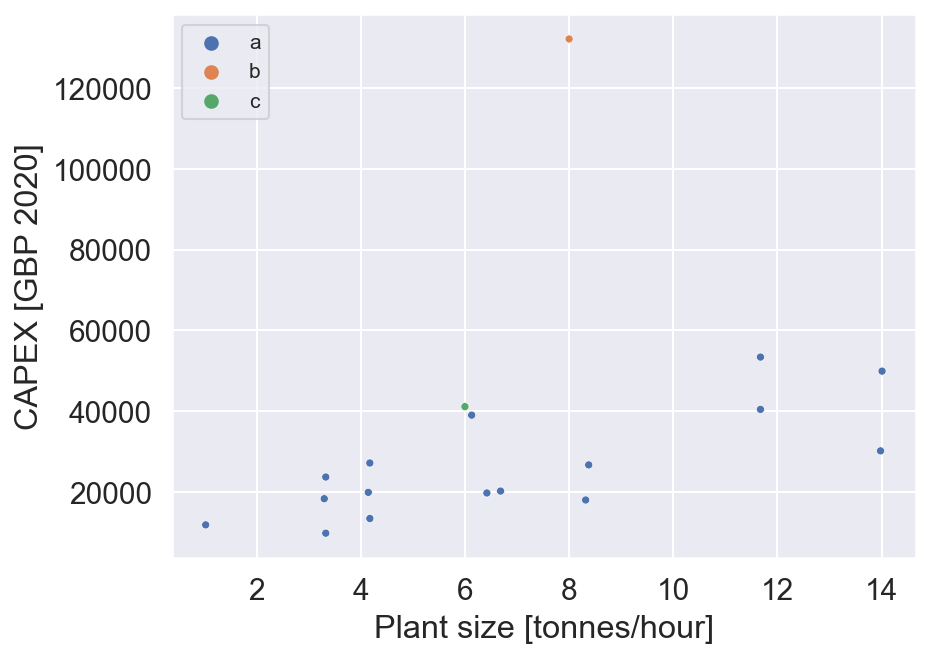

In [8]:
## Plot all data
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df_cooler, x="Plant size [tonnes/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference Label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

## Plot cleaned pellet cooler data

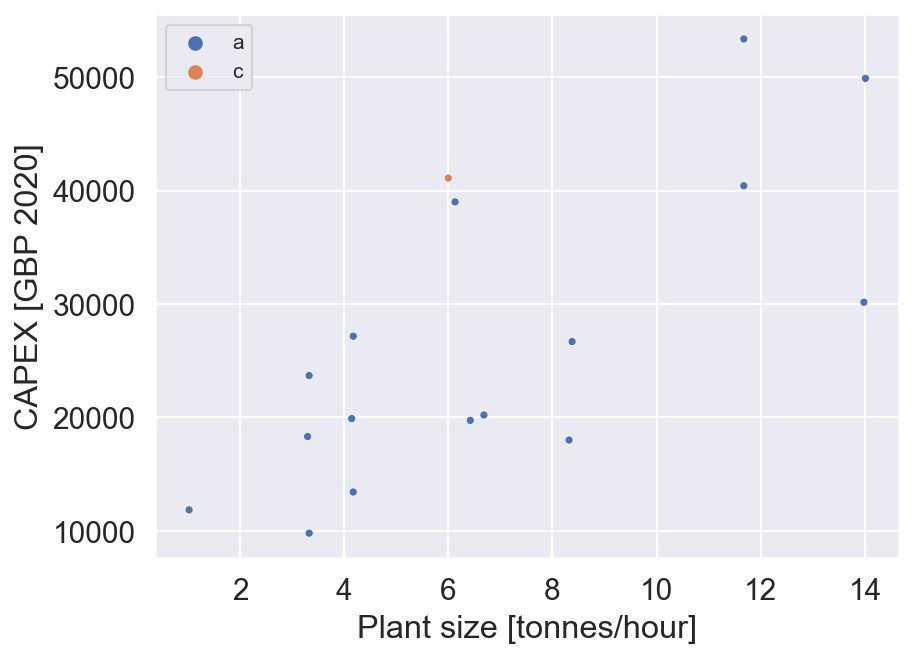

In [9]:
## Plot all data
df_cooler_cleaned = df_cooler[df_cooler["Reference Label"] != "b"]

sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
sns.scatterplot(data=df_cooler_cleaned, x="Plant size [tonnes/hour]", y="CAPEX_GBP_CEPCI_2020", hue="Reference Label", s=15)
ax.set_ylabel("CAPEX [GBP 2020]")
plt.legend(loc='upper left', fontsize=10)
plt.show()

Straight line fit: R2: 0.514; RMSE: 8913; MAPE: 31 %
Power curve fit: R2: 0.518; RMSE: 8883; MAPE: 31 %
2nd degree polynomial fit: R2: 0.518; RMSE: 8876; MAPE: 31 %
3rd degree polynomial: R2: 0.520; RMSE: 8859; MAPE: 31 %


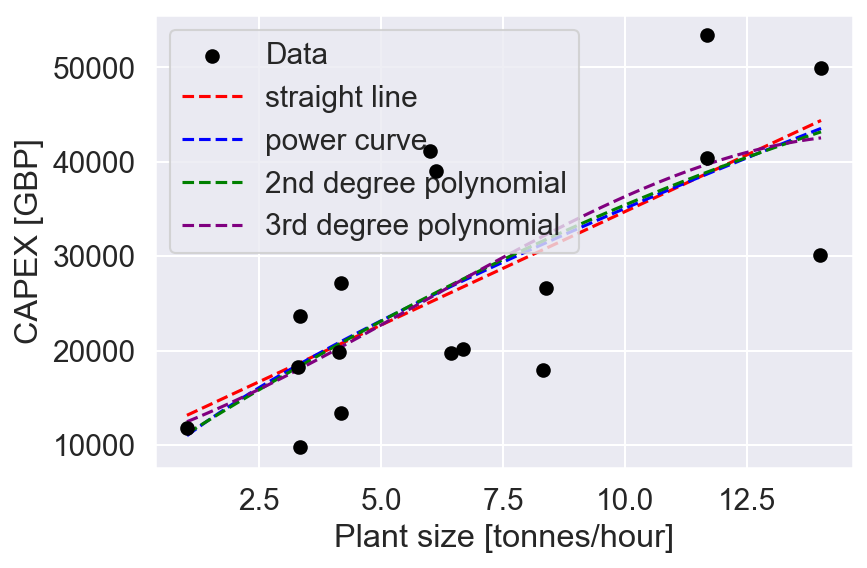

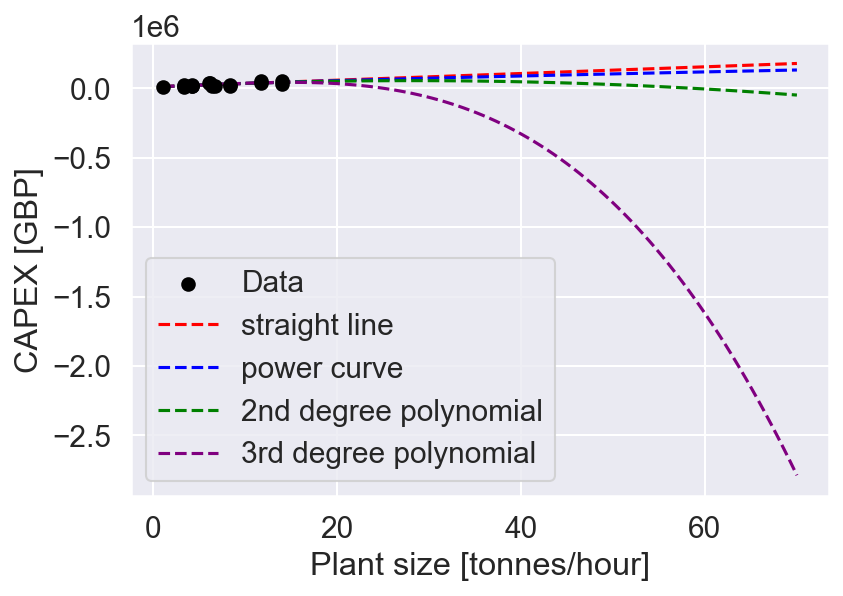

{'straight_line': {'Constants': array([ 2402.72382947, 10724.22196396]),
  'R2': 0.5142655984488576,
  'RMSE': 8913.070435567191},
 'power_curve': {'Constants': array([5.24268048e+03, 7.48876868e-01, 5.69041185e+03]),
  'R2': 0.5175190273675774,
  'RMSE': 8883.170596028564},
 '2nd_degree_polynomial': {'Constants': array([3351.93832221,  -59.35663522, 7869.72878758]),
  'R2': 0.5182929754637435,
  'RMSE': 8876.042986166327},
 '3rd_degree_polynomial': {'Constants': array([ 1736.44781577,   197.68695584,   -11.31673978, 10530.70957168]),
  'R2': 0.5201437219644275,
  'RMSE': 8858.975439182492},
 'data_range': {'min': 1.021599533, 'max': 14.01050788}}

In [10]:
# Display curve fits
display_curve_fits(dataframe=df_cooler_cleaned, x_data_label="Plant size [tonnes/hour]", y_data_label="CAPEX_GBP_CEPCI_2020", plot_y_label="CAPEX [GBP]")


- Polynomial functions become unstable for larger plants
- Power curve marginally a better fit than linear fit. 

# Display fits

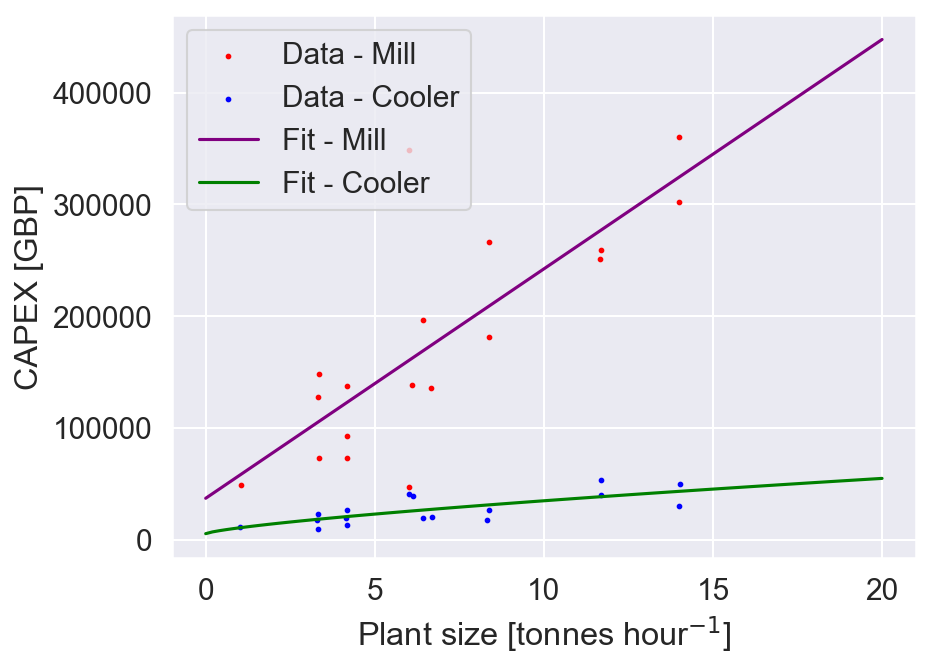

In [12]:
# Display data and fits in same plot
x_array =np.linspace(start=0, stop=20, num=100)

fig, ax = plt.subplots(figsize=tuple(plot_style.fig_size), dpi=150)
ax.scatter(df_mill["Plant size [tonnes/hour]"], df_mill["CAPEX_GBP_CEPCI_2020"], label="Data - Mill", color="red", s=3)
ax.scatter(df_cooler_cleaned["Plant size [tonnes/hour]"], df_cooler_cleaned["CAPEX_GBP_CEPCI_2020"], label="Data - Cooler", color="blue", s=3)

ax.plot(x_array, func_straight_line(x_array, *[20509.76068945, 37321.72296998]), label="Fit - Mill", color="purple")
ax.plot(x_array, func_power_curve(x_array, *[5.24268048e+03, 7.48876868e-01, 5.69041185e+03]), label="Fit - Cooler", color="green")

ax.set_xlabel("Plant size [tonnes hour$^{-1}$]")
ax.set_ylabel("CAPEX [GBP]")
plt.legend()
plt.show()


# Conclusions
- Can fit effective models across a fairly large region.
- Pellet mill:
    - Straight line fit most appropriate.
- Pellet cooler:
    - Discard data from Reference Label "b".
    - Power fit most appropriate.